In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Yenuganti Prathyusha 212223240187

In [4]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=10, h2=11, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [5]:
torch.manual_seed(32)
model = Model()

In [6]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [8]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [9]:
torch.manual_seed(4)
model = Model()

In [10]:
criterion =nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.22303259
epoch: 11  loss: 0.87833655
epoch: 21  loss: 0.58939141
epoch: 31  loss: 0.39461419
epoch: 41  loss: 0.27418667
epoch: 51  loss: 0.16842622
epoch: 61  loss: 0.10710016
epoch: 71  loss: 0.08045476
epoch: 81  loss: 0.06811187
epoch: 91  loss: 0.06185398


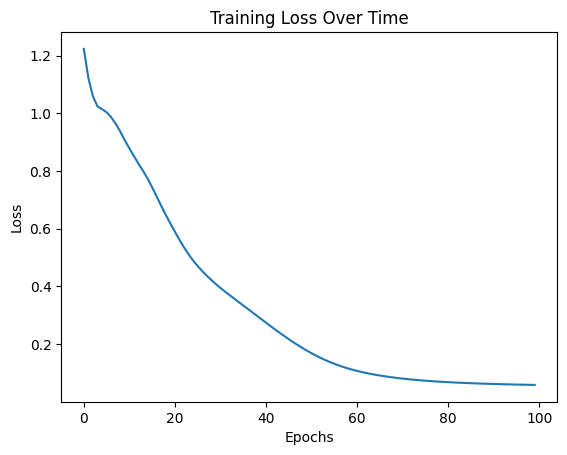

In [12]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

In [13]:
with torch.no_grad():
  y_val = model.forward(X_test)
  loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06064259


In [14]:
correct =0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}.{str(y_val):38} {str(y_test[i])}')
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1.tensor([-2.0868,  5.4851, -0.1823])    tensor(1)
 2.tensor([-1.3220,  6.1087, -1.5964])    tensor(1)
 3.tensor([  9.5932,   4.2332, -17.2719]) tensor(0)
 4.tensor([-3.6740,  5.9091,  1.9384])    tensor(1)
 5.tensor([-8.4603,  5.7072,  8.9899])    tensor(2)
 6.tensor([-13.1001,   6.0068,  15.5544]) tensor(2)
 7.tensor([  9.5459,   4.4276, -17.2599]) tensor(0)
 8.tensor([ 10.5079,   4.4073, -18.7977]) tensor(0)
 9.tensor([-8.3007,  5.9583,  8.6161])    tensor(2)
10.tensor([-10.5082,   6.2144,  11.7113]) tensor(2)
11.tensor([-11.4983,   6.1714,  13.1680]) tensor(2)
12.tensor([  9.3643,   3.9591, -16.8128]) tensor(0)
13.tensor([-11.0567,   5.9112,  12.6369]) tensor(2)
14.tensor([-4.0058,  5.7319,  2.4906])    tensor(1)
15.tensor([-8.2574,  6.1449,  8.4863])    tensor(2)
16.tensor([-1.3825,  5.8885, -1.3931])    tensor(1)
17.tensor([-6.2744,  5.6553,  5.8262])    tensor(2)
18.tensor([ 10.6742,   4.4654, -19.0832]) tensor(0)
19.tensor([-3.6942,  5.9322,  1.9201])    tensor(1)
20.tensor([-

In [15]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

In [16]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [17]:
with torch.no_grad():
  y_val=new_model.forward(X_test)
  loss = criterion(y_val,y_test)
print(f'{loss:.8f}')

0.06064259


In [18]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

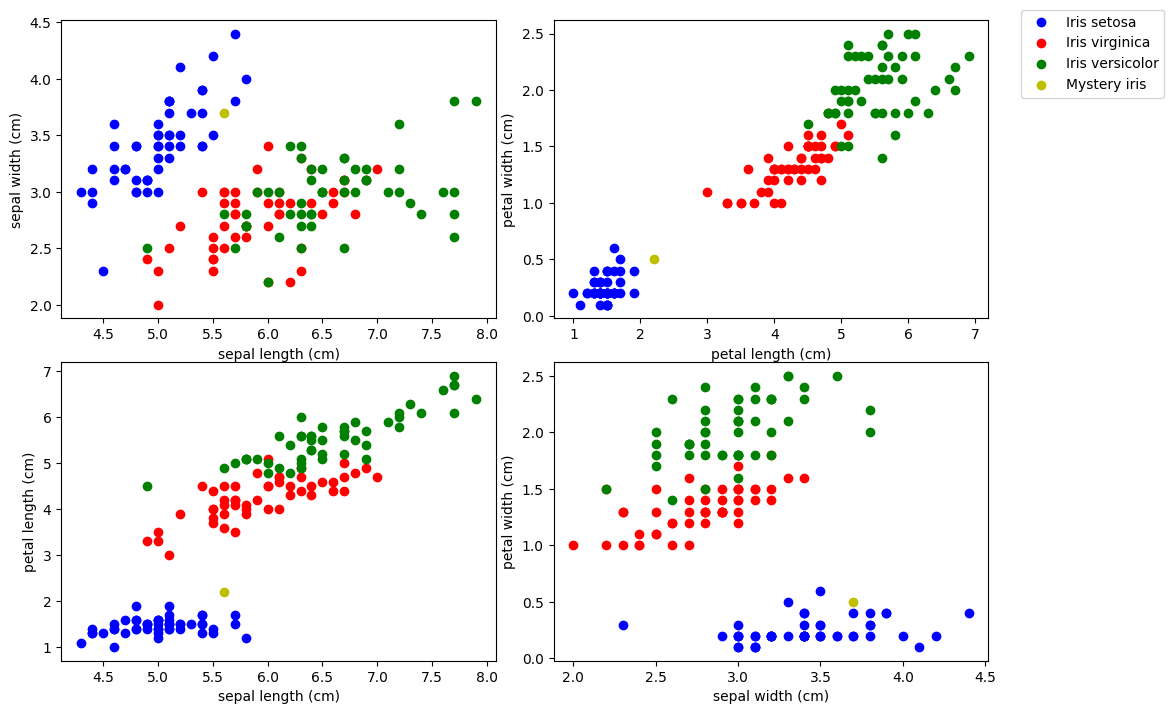

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [20]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([  9.6885,   5.0318, -17.6774])

Iris setosa


Yenuganti Prathyusha 212223240187

In [22]:
torch.save(model.state_dict(),'Prathyusha_ex2.pt')